In [1]:
import pickle
import os
from tqdm import tqdm

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import torch.nn as nn
import torch.nn.functional as F
import torch

from astropy.table import Table

/home/svasilyev/.conda/envs/svasilyev/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/svasilyev/.conda/envs/svasilyev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = 'data'
FLOAT_PREC = 3

In [3]:
t = Table.read(f'{data_dir}/23_DR16Q_v4.fits')
dr16q = t[['SDSS_NAME', 'RA', 'DEC', 'Z', 'Z_PCA', 'SOURCE_Z', 'M_I']].to_pandas()
dr16q['RA'] = np.around(dr16q['RA'], FLOAT_PREC)
dr16q['DEC'] = np.around(dr16q['DEC'], FLOAT_PREC)

In [4]:
dr16q

,SDSS_NAME,RA,DEC,Z,Z_PCA,SOURCE_Z,M_I
0,b'000000.15+353104.2',0.001,35.518,0.845435,0.845751,b'PIPE',-25.623294
1,b'000000.33+310325.3',0.001,31.057,2.035491,2.034443,b'PIPE',-24.538577
2,b'000000.36+070350.8',0.002,7.064,1.574227,1.574832,b'PIPE',-23.570057
3,b'000000.36+274356.2',0.002,27.732,1.770552,1.771135,b'PIPE',-23.851261
4,b'000000.45+092308.2',0.002,9.386,2.024146,2.025909,b'PIPE',-27.620018
...,...,...,...,...,...,...,...
750409,b'235959.78+285717.0',359.999,28.955,2.452000,2.447446,b'VI',-25.109041
750410,b'235959.83+344315.0',359.999,34.721,3.109000,3.106480,b'VI',-27.418691
750411,b'235959.90+031606.9',360.000,3.269,1.232962,1.233388,b'PIPE',-25.993183
750412,b'235959.94+204315.8',360.000,20.721,2.009865,2.010016,b'PIPE',-25.865189


In [5]:
full_data = pd.read_csv('full_data.csv')
full_data

,SDSS_NAME,RA,DEC,Z,Z_PCA,SOURCE_Z,M_I,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,b'000000.33+310325.3',0.001,31.057,2.035491,2.034443,b'PIPE',-24.538577,22.074640,21.787479,21.562507,...,21.058581,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4
1,b'000000.36+070350.8',0.002,7.064,1.574227,1.574832,b'PIPE',-23.570057,22.498194,22.103252,21.854685,...,21.778303,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613000,0.561226,DR16Q_22_v4
2,b'000000.36+274356.2',0.002,27.732,1.770552,1.771135,b'PIPE',-23.851261,22.330387,21.903107,21.751831,...,21.972976,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4
3,b'000000.45+092308.2',0.002,9.386,2.024146,2.025909,b'PIPE',-27.620018,18.765830,18.661867,18.499508,...,18.119927,0.230702,0.535612,0.304910,-0.049329,0.083550,0.047153,NaN,NaN,DR16Q_22_v4
4,b'000000.45+174625.4',0.002,17.774,2.309000,2.309822,b'VI',-24.311246,22.265783,21.813904,21.999912,...,21.328042,-0.157859,0.077013,0.234873,0.384439,0.450456,-0.287098,2.121082,0.503914,train_20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731177,b'235959.74+100700.4',359.999,10.117,2.415000,2.412447,b'VI',-25.150680,23.056658,21.692741,21.373058,...,20.886425,0.278178,0.744830,0.466652,-0.086651,-0.220069,0.502369,2.598000,0.508071,train_20
731178,b'235959.76+242448.7',359.999,24.414,1.490356,1.490609,b'PIPE',-24.630260,20.921111,20.732991,20.529058,...,20.534266,0.394148,0.585503,0.191355,-0.464195,-0.267949,-0.534182,1.519121,0.532895,train_20
731179,b'235959.78+285717.0',359.999,28.955,2.452000,2.447446,b'VI',-25.109041,21.876842,21.168578,21.233727,...,20.970083,-0.109864,0.078388,0.188252,0.081485,0.037796,-0.513353,2.333000,0.827930,train_20
731180,b'235959.90+031606.9',360.000,3.269,1.232962,1.233388,b'PIPE',-25.993183,18.791953,18.815835,18.557703,...,19.307395,0.338588,0.074939,-0.263649,-0.569811,-0.470473,-0.625142,1.319833,0.751813,train_20


In [6]:
pred_data = full_data[~full_data['zoo_x1a35_z_max'].isna()]
pred_data = pred_data[pred_data['Z'] >= 0]
pred_data.reset_index(inplace=True, drop=True)
pred_data

,SDSS_NAME,RA,DEC,Z,Z_PCA,SOURCE_Z,M_I,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,b'000000.33+310325.3',0.001,31.057,2.035491,2.034443,b'PIPE',-24.538577,22.074640,21.787479,21.562507,...,21.058581,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4
1,b'000000.36+070350.8',0.002,7.064,1.574227,1.574832,b'PIPE',-23.570057,22.498194,22.103252,21.854685,...,21.778303,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613000,0.561226,DR16Q_22_v4
2,b'000000.36+274356.2',0.002,27.732,1.770552,1.771135,b'PIPE',-23.851261,22.330387,21.903107,21.751831,...,21.972976,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4
3,b'000000.45+174625.4',0.002,17.774,2.309000,2.309822,b'VI',-24.311246,22.265783,21.813904,21.999912,...,21.328042,-0.157859,0.077013,0.234873,0.384439,0.450456,-0.287098,2.121082,0.503914,train_20
4,b'000000.47-002703.9',0.002,-0.451,0.250000,0.249966,b'VI',-20.827024,21.672738,21.193839,20.508787,...,19.557413,0.818934,1.409359,0.590424,0.096018,0.009057,-0.250328,0.350800,0.702891,DR16Q_22_v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683390,b'235959.74+100700.4',359.999,10.117,2.415000,2.412447,b'VI',-25.150680,23.056658,21.692741,21.373058,...,20.886425,0.278178,0.744830,0.466652,-0.086651,-0.220069,0.502369,2.598000,0.508071,train_20
683391,b'235959.76+242448.7',359.999,24.414,1.490356,1.490609,b'PIPE',-24.630260,20.921111,20.732991,20.529058,...,20.534266,0.394148,0.585503,0.191355,-0.464195,-0.267949,-0.534182,1.519121,0.532895,train_20
683392,b'235959.78+285717.0',359.999,28.955,2.452000,2.447446,b'VI',-25.109041,21.876842,21.168578,21.233727,...,20.970083,-0.109864,0.078388,0.188252,0.081485,0.037796,-0.513353,2.333000,0.827930,train_20
683393,b'235959.90+031606.9',360.000,3.269,1.232962,1.233388,b'PIPE',-25.993183,18.791953,18.815835,18.557703,...,19.307395,0.338588,0.074939,-0.263649,-0.569811,-0.470473,-0.625142,1.319833,0.751813,train_20


In [7]:
t_df = dr16q[dr16q['Z'] >= 4]

/tmp/ipykernel_766183/984804601.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'], bins=np.arange(5,7.3,0.1), alpha=0.3, label='train_20')
/tmp/ipykernel_766183/984804601.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'], bins=np.arange(5,7.3,0.1), alpha=0.3, label='DR16Q_22_v4')


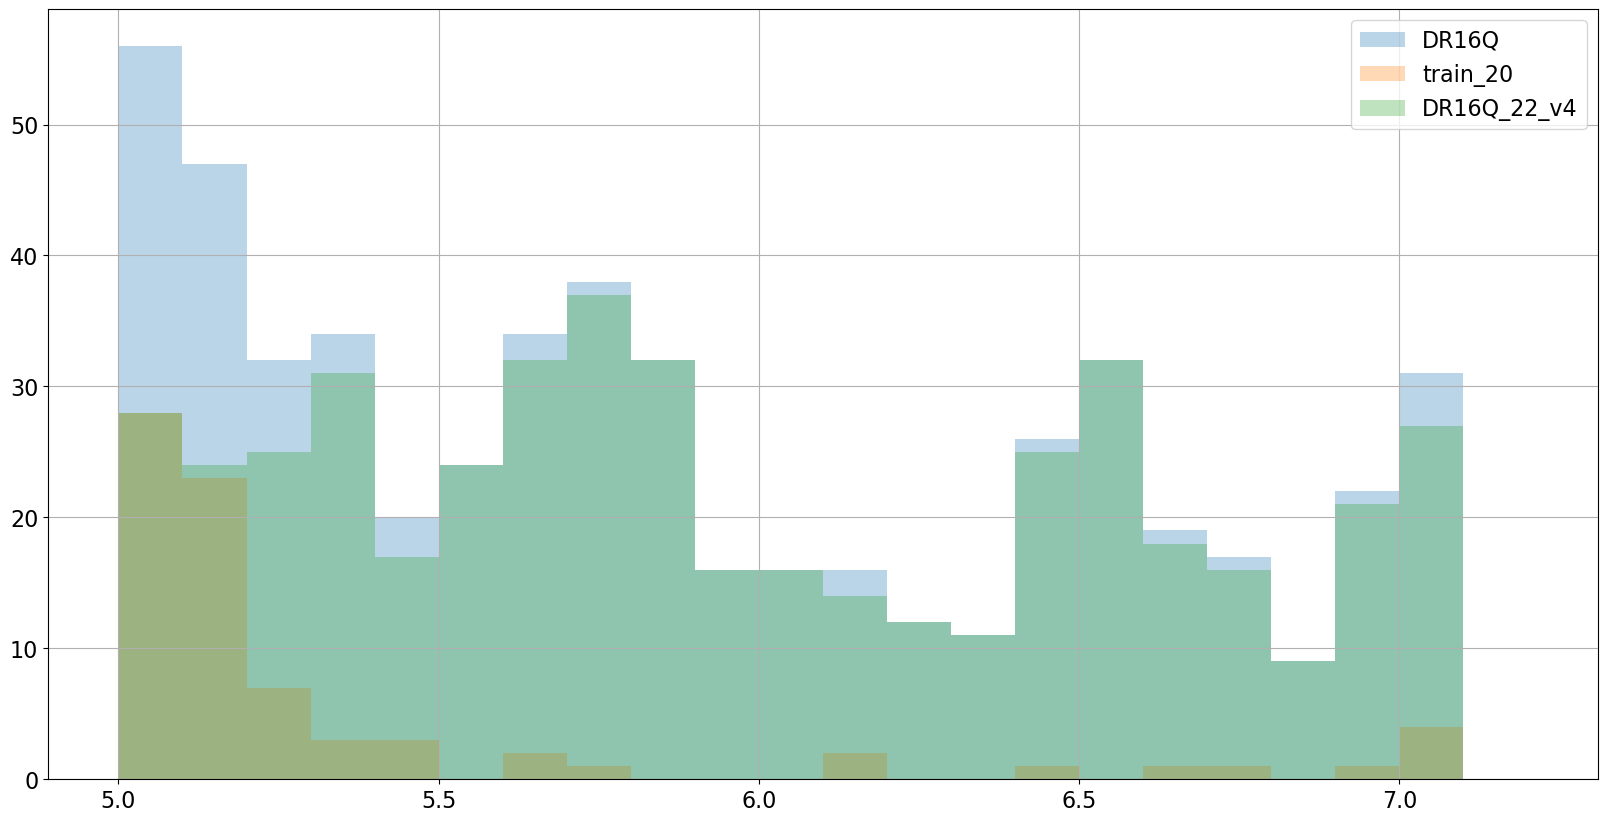

In [8]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 10))
plt.grid()

plt.hist(pred_data[pred_data['Z'] > 5]['Z'], bins=np.arange(5,7.3,0.1), alpha=0.3, label='DR16Q')
plt.hist(pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'], bins=np.arange(5,7.3,0.1), alpha=0.3, label='train_20')
plt.hist(pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'], bins=np.arange(5,7.3,0.1), alpha=0.3, label='DR16Q_22_v4')
plt.legend();

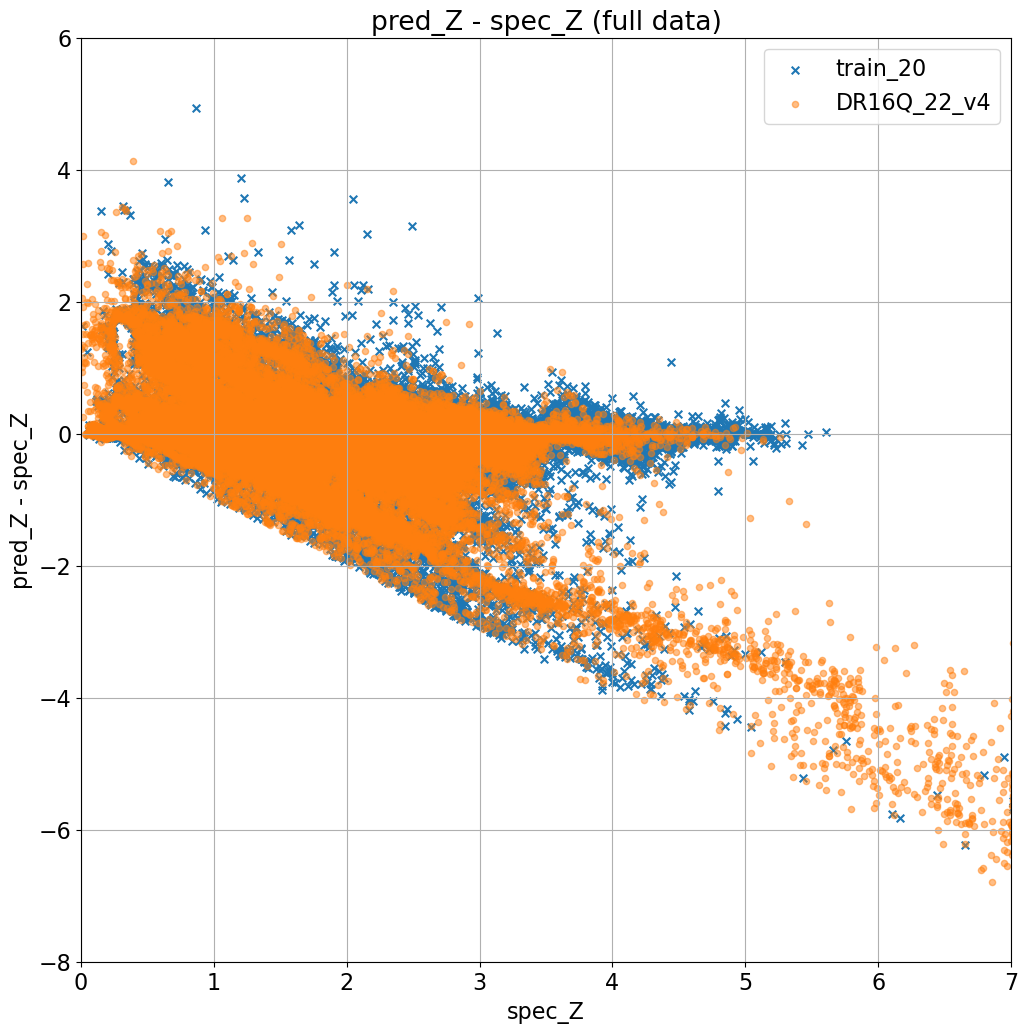

In [9]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(0, 7)
plt.ylim(-8, 6)
plt.grid()

plt.scatter(
    pred_data[pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['SOURCE'] == 'train_20']['Z'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'] - pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('pred_Z - spec_Z (full data)')
plt.xlabel('spec_Z')
plt.ylabel('pred_Z - spec_Z');

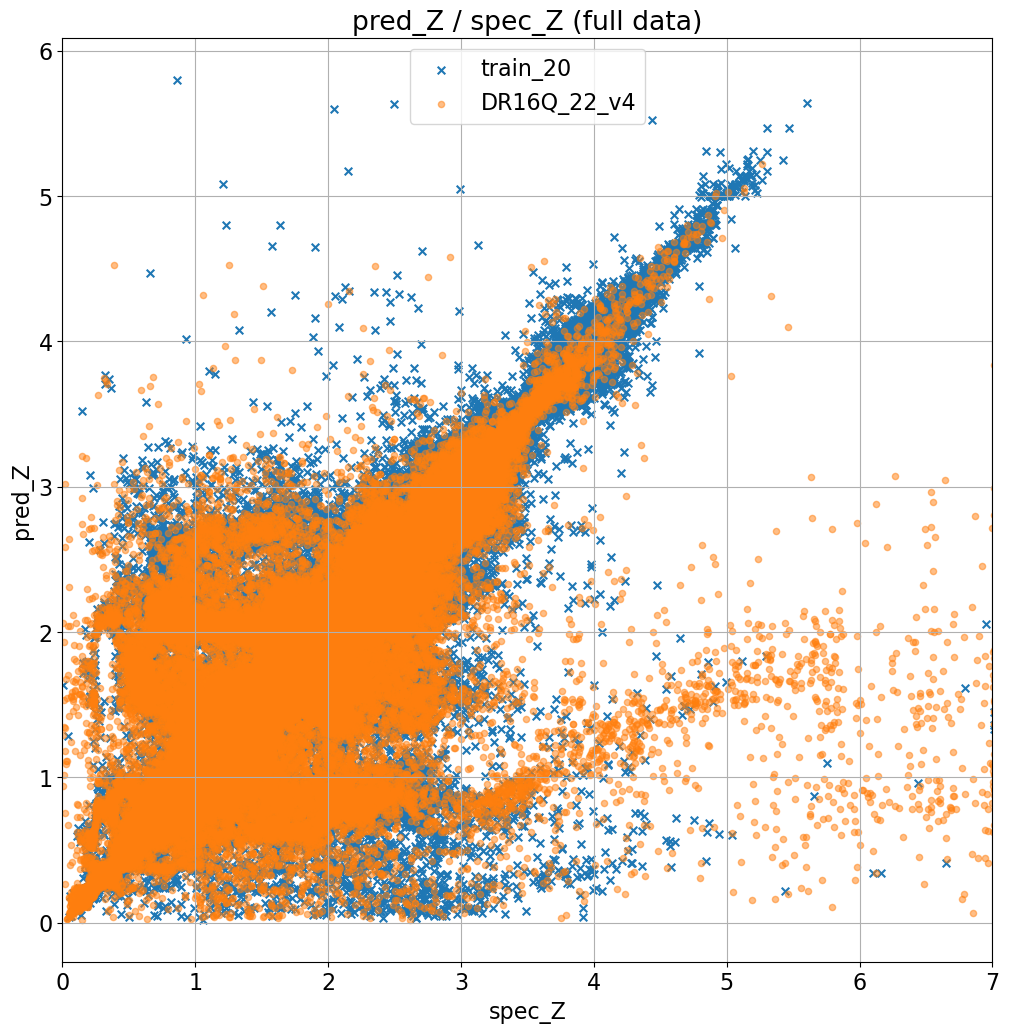

In [33]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(0, 7)
# plt.ylim(-8, 6)
plt.grid()

plt.scatter(
    pred_data[pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('pred_Z / spec_Z (full data)')
plt.xlabel('spec_Z')
plt.ylabel('pred_Z');

/tmp/ipykernel_766183/4080855400.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/4080855400.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/4080855400.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
/tmp/ipykernel_766183/4080855400.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxCo

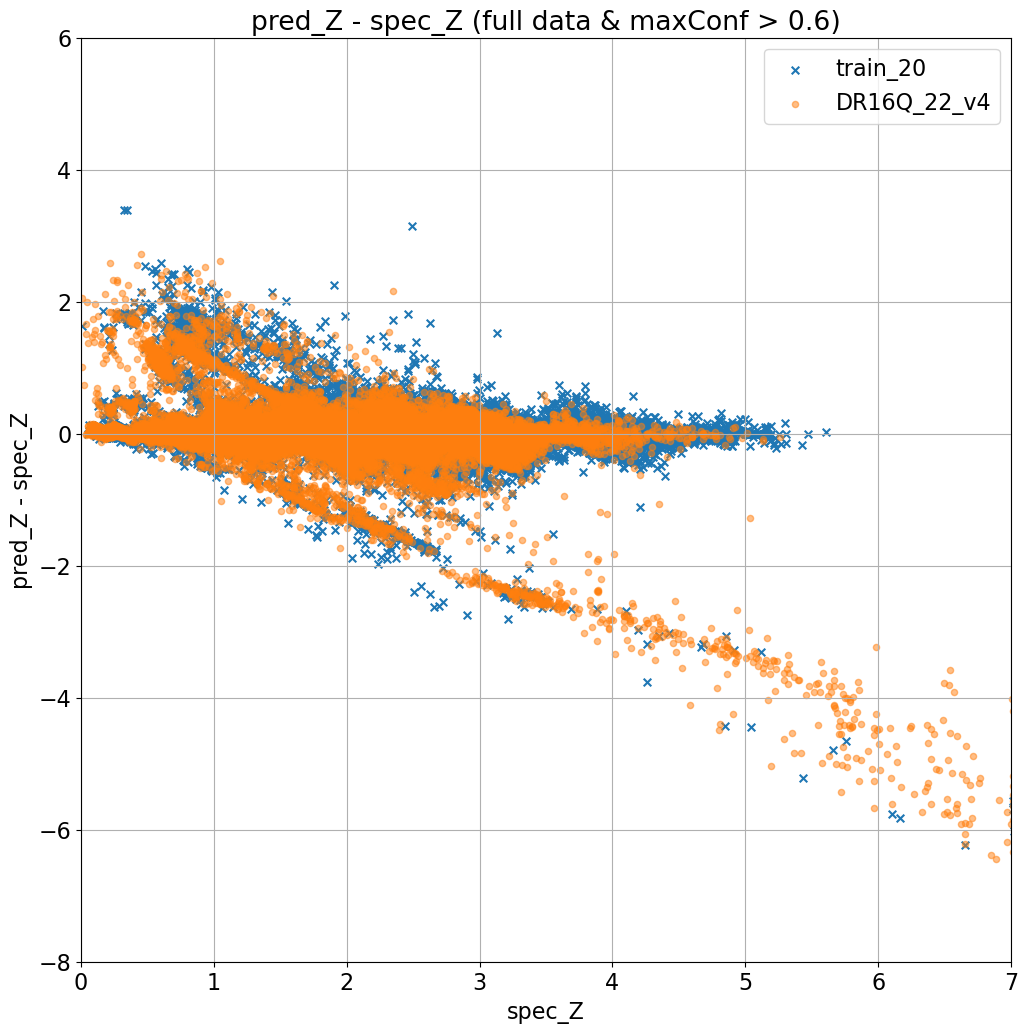

In [10]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(0, 7)
plt.ylim(-8, 6)
plt.grid()

plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('pred_Z - spec_Z (full data & maxConf > 0.6)')
plt.xlabel('spec_Z')
plt.ylabel('pred_Z - spec_Z');

/tmp/ipykernel_766183/3875604734.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/3875604734.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/3875604734.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
/tmp/ipykernel_766183/3875604734.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],


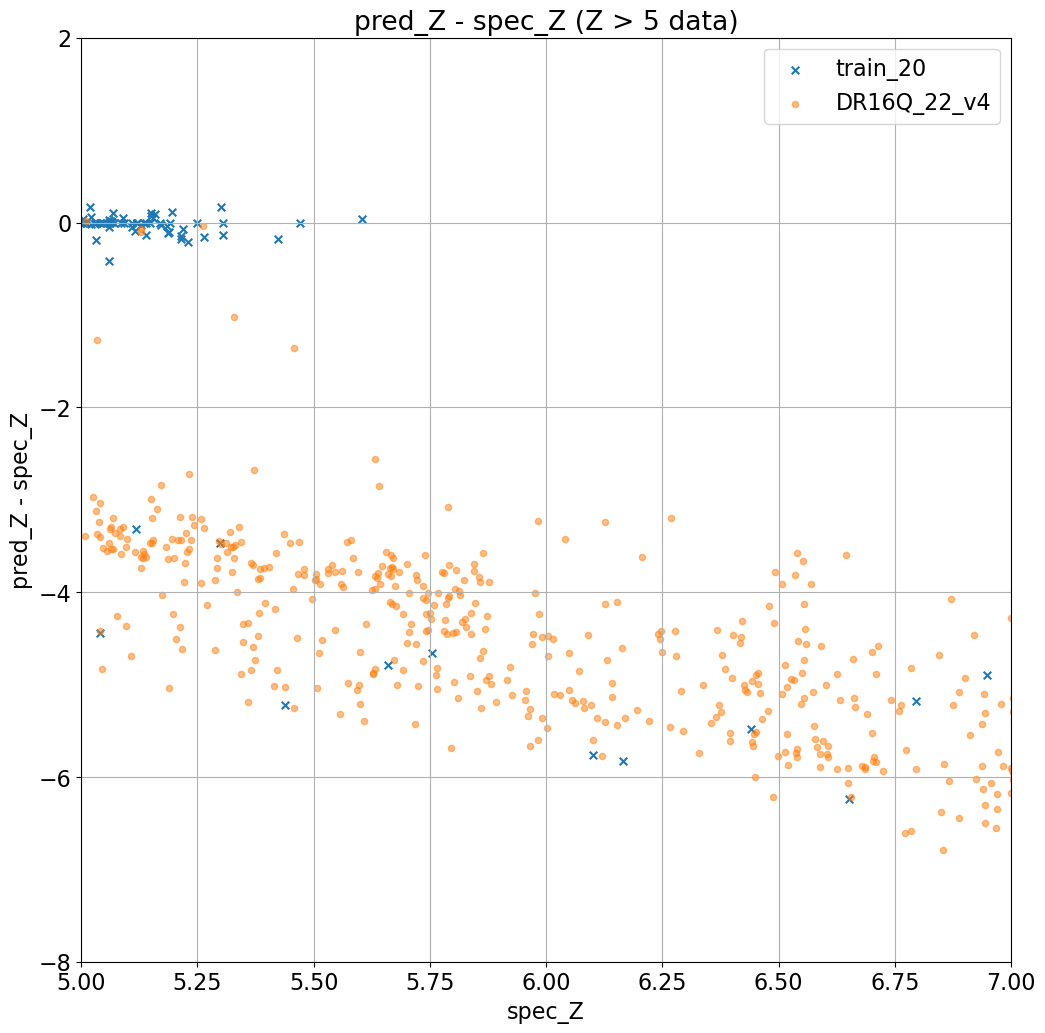

In [11]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(5, 7)
plt.ylim(-8, 2)
plt.grid()

plt.scatter(
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('pred_Z - spec_Z (Z > 5 data)')
plt.xlabel('spec_Z')
plt.ylabel('pred_Z - spec_Z');

/tmp/ipykernel_766183/4136809889.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/4136809889.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/4136809889.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
/tmp/ipykernel_766183/4136809889.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 

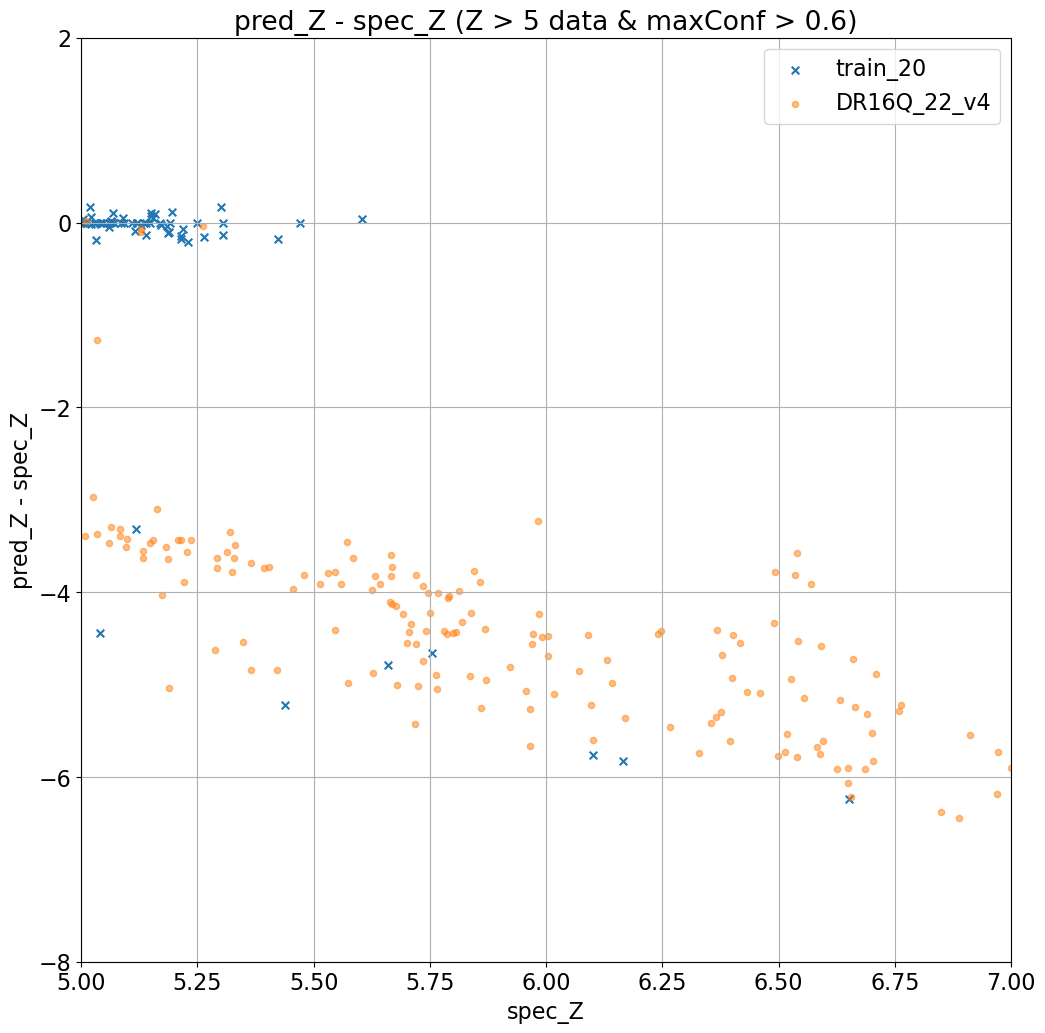

In [12]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(5, 7)
plt.ylim(-8, 2)
plt.grid()

plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('pred_Z - spec_Z (Z > 5 data & maxConf > 0.6)')
plt.xlabel('spec_Z')
plt.ylabel('pred_Z - spec_Z');

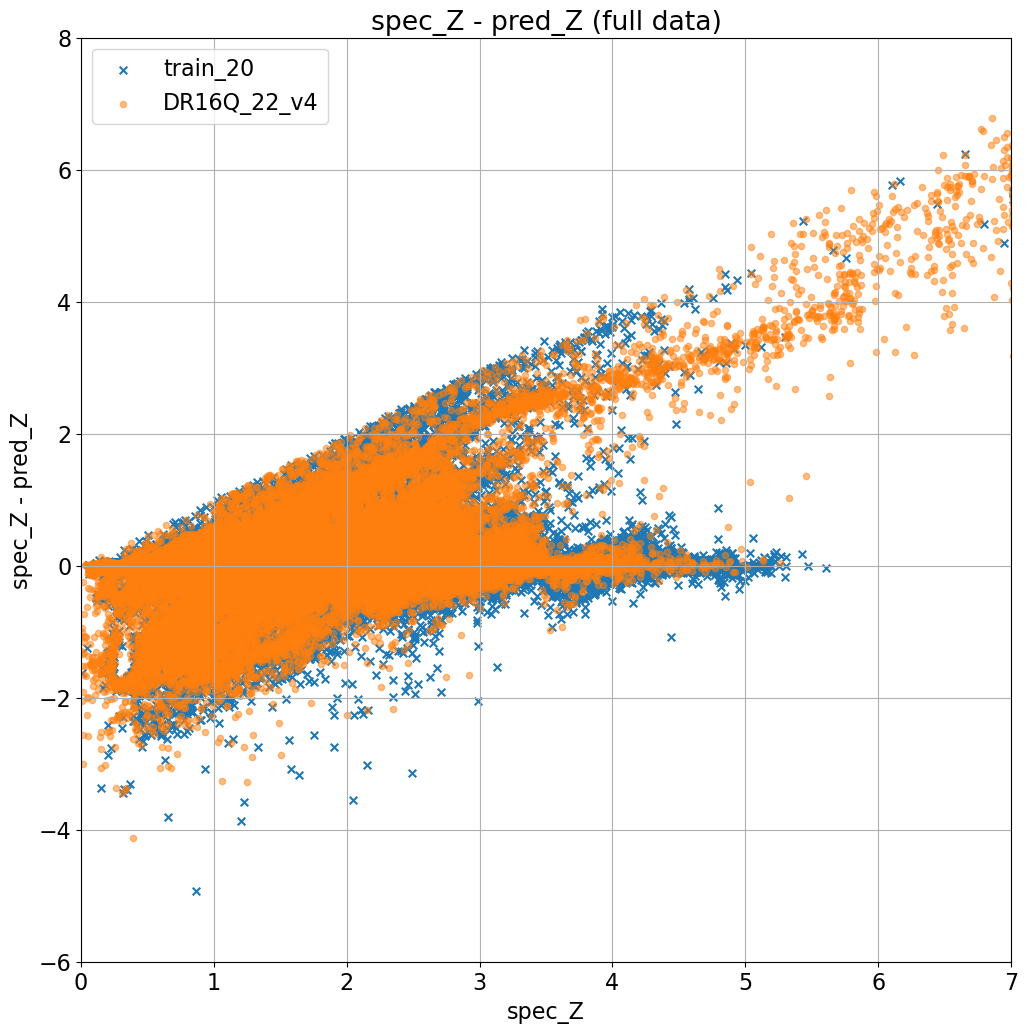

In [13]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(0, 7)
plt.ylim(-6, 8)
plt.grid()

plt.scatter(
    pred_data[pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'] - pred_data[pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('spec_Z - pred_Z (full data)')
plt.xlabel('spec_Z')
plt.ylabel('spec_Z - pred_Z');

/tmp/ipykernel_766183/3607334392.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/3607334392.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
/tmp/ipykernel_766183/3607334392.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
/tmp/ipykernel_766183/3607334392.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pr

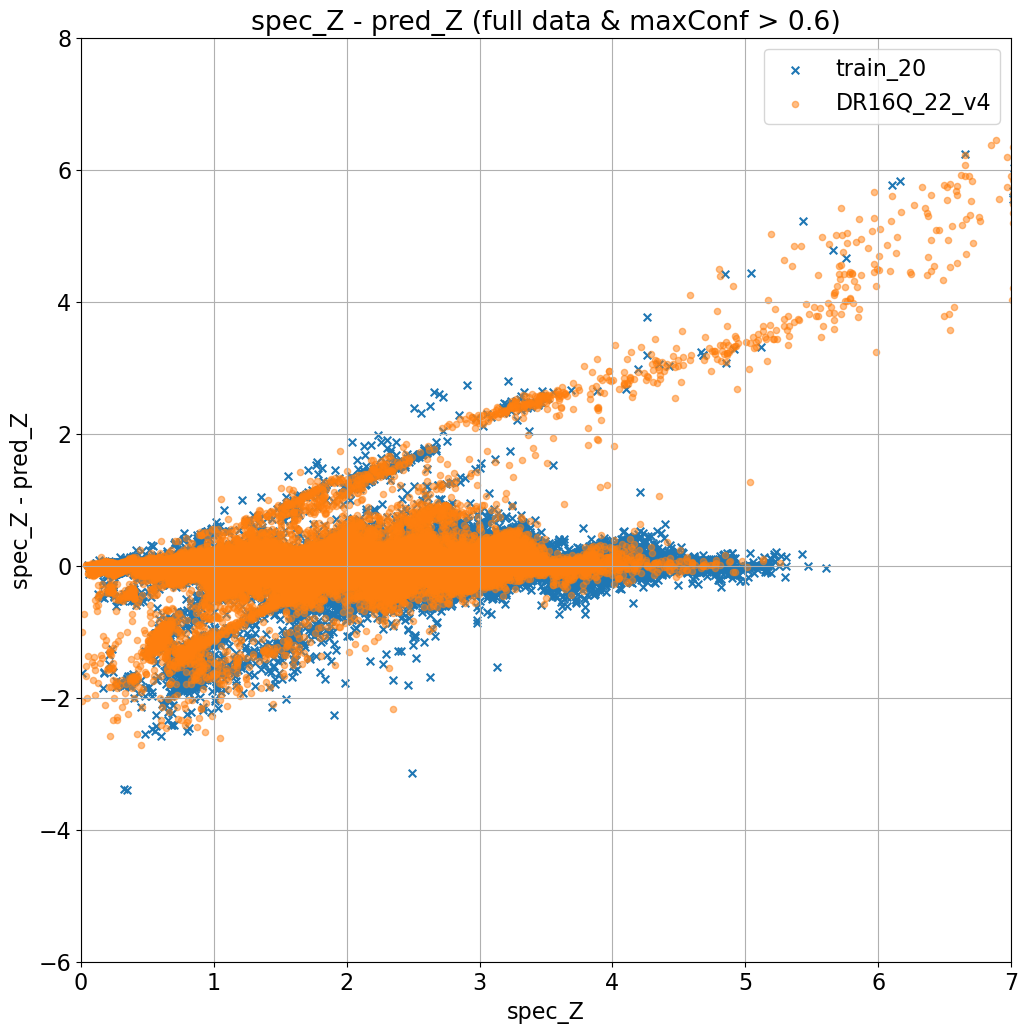

In [14]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(0, 7)
plt.ylim(-6, 8)
plt.grid()

plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('spec_Z - pred_Z (full data & maxConf > 0.6)')
plt.xlabel('spec_Z')
plt.ylabel('spec_Z - pred_Z');

/tmp/ipykernel_766183/2285827632.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/2285827632.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
/tmp/ipykernel_766183/2285827632.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
/tmp/ipykernel_766183/2285827632.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'],


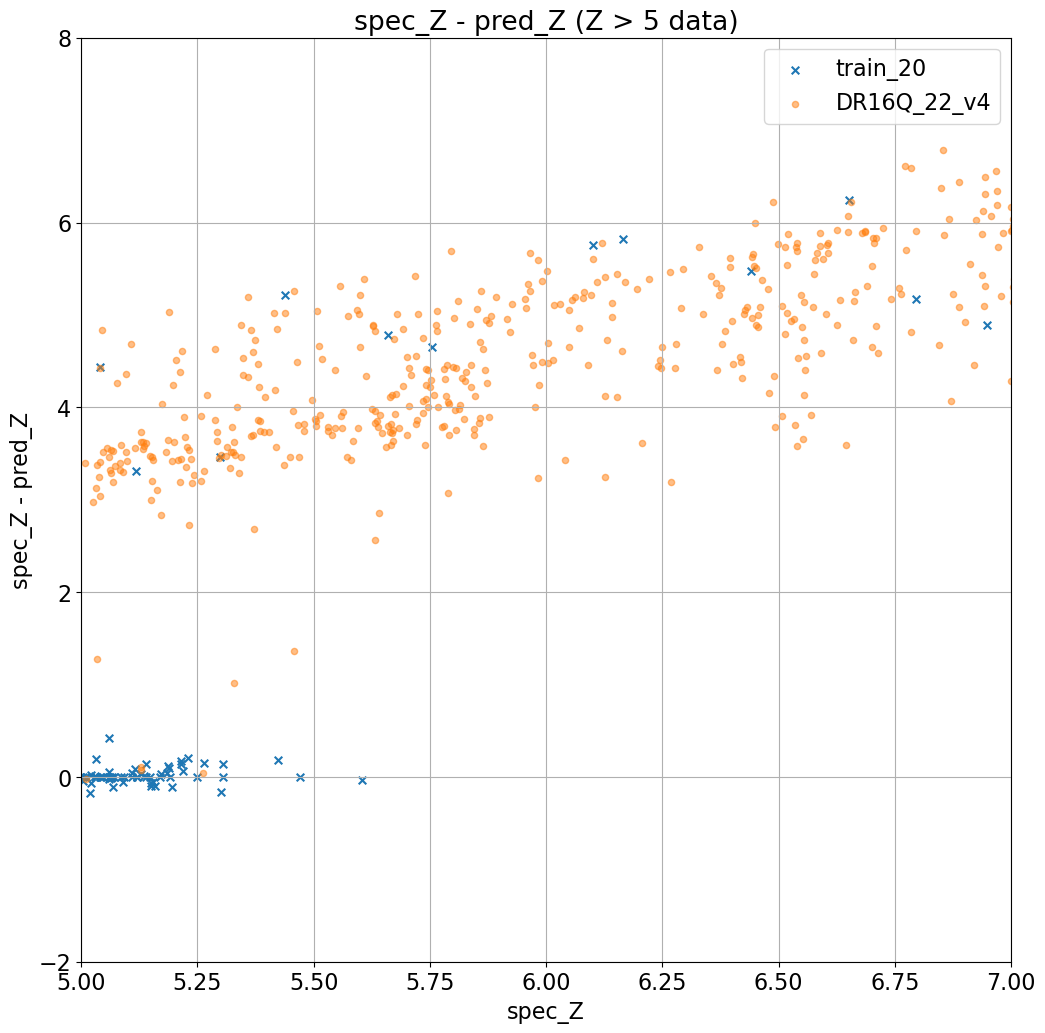

In [15]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(5, 7)
plt.ylim(-2, 8)
plt.grid()

plt.scatter(
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'] - pred_data[pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('spec_Z - pred_Z (Z > 5 data)')
plt.xlabel('spec_Z')
plt.ylabel('spec_Z - pred_Z');

/tmp/ipykernel_766183/725504932.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
/tmp/ipykernel_766183/725504932.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
/tmp/ipykernel_766183/725504932.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
/tmp/ipykernel_766183/725504932.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][p

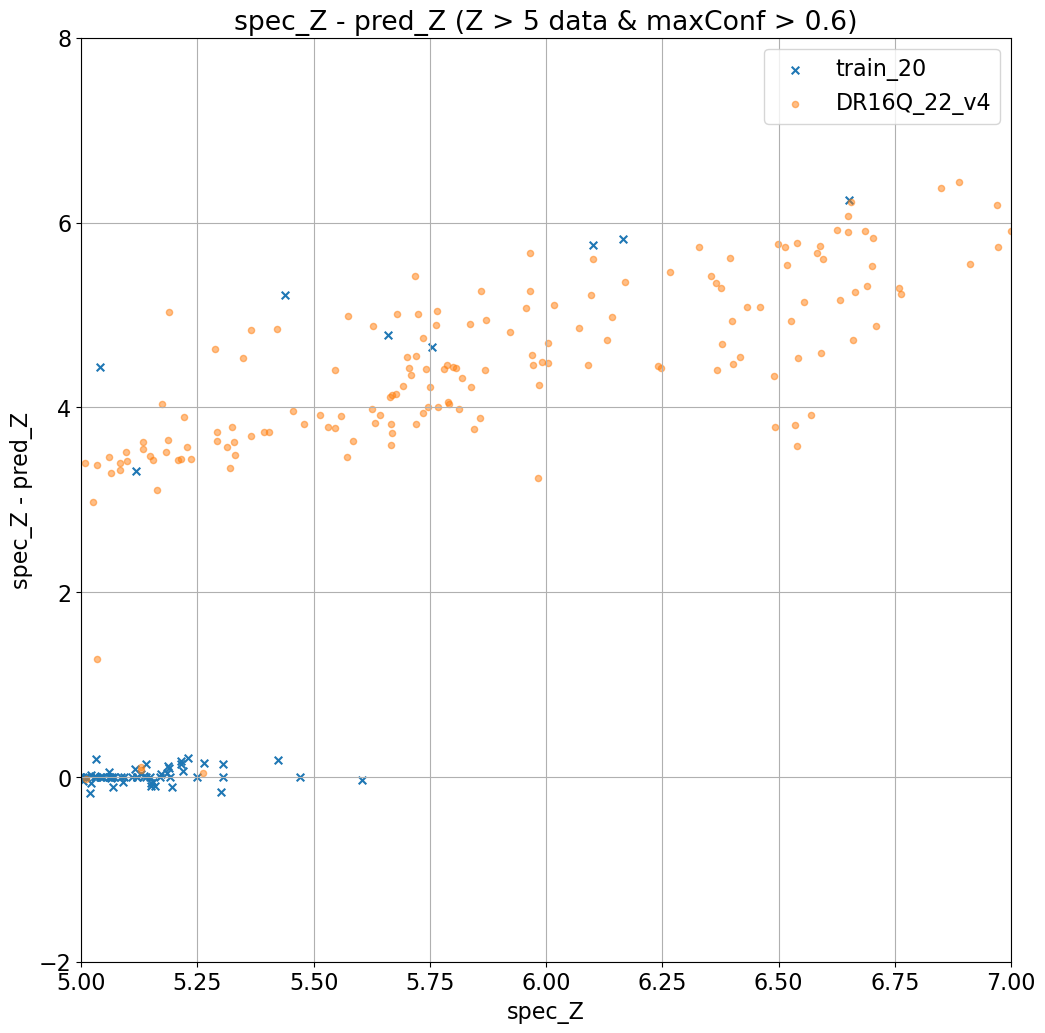

In [16]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.xlim(5, 7)
plt.ylim(-2, 8)
plt.grid()

plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'train_20']['zoo_x1a35_z_max'],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'],
    pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['Z'] - pred_data[pred_data['zoo_x1a35_z_maxConf'] > 0.6][pred_data['Z'] > 5][pred_data['SOURCE'] == 'DR16Q_22_v4']['zoo_x1a35_z_max'],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('spec_Z - pred_Z (Z > 5 data & maxConf > 0.6)')
plt.xlabel('spec_Z')
plt.ylabel('spec_Z - pred_Z');

In [17]:
features = pred_data.iloc[:, 6:72].values

In [18]:
pca = PCA(n_components=2).fit(features)

In [19]:
pca_features = pca.transform(features)

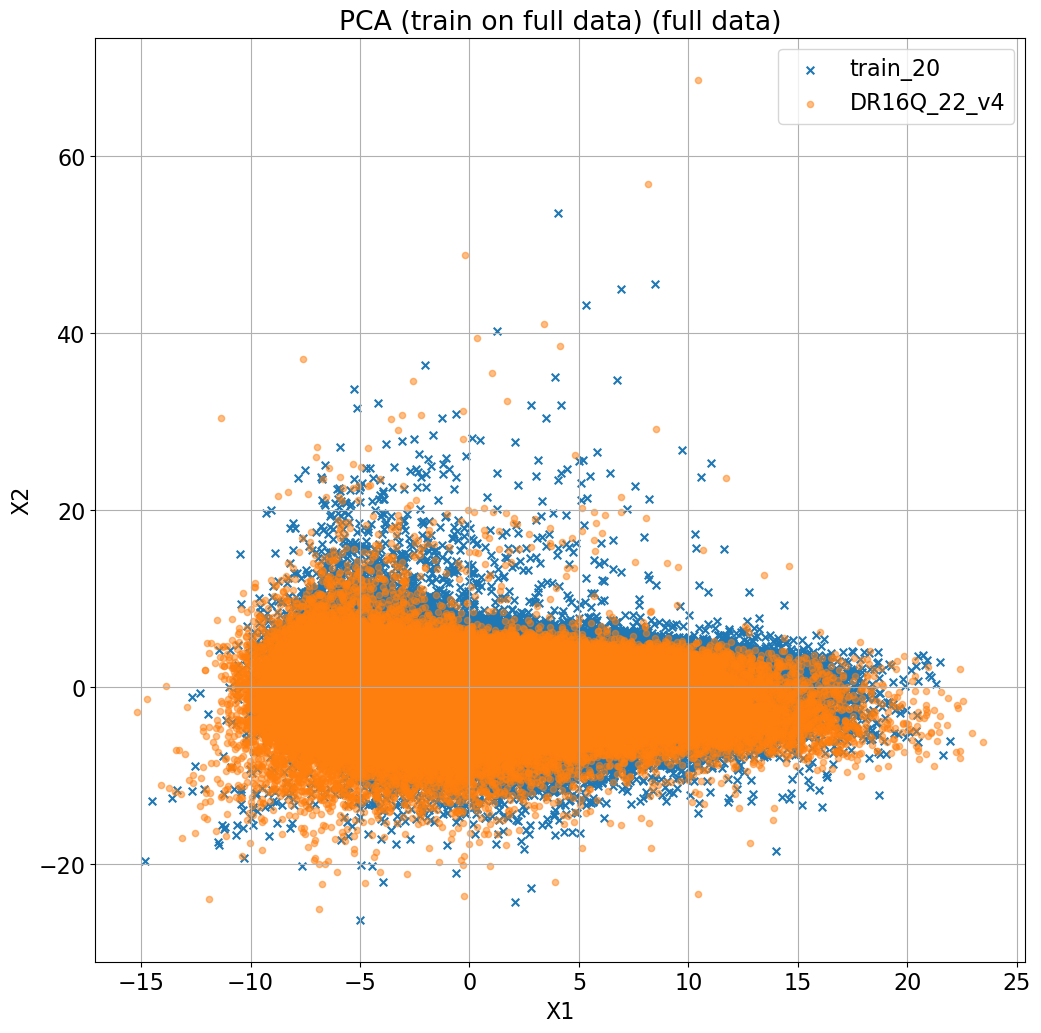

In [20]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.grid()

plt.scatter(
    pca_features[pred_data['SOURCE'] == 'train_20'][:, 0],
    pca_features[pred_data['SOURCE'] == 'train_20'][:, 1],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pca_features[pred_data['SOURCE'] == 'DR16Q_22_v4'][:, 0],
    pca_features[pred_data['SOURCE'] == 'DR16Q_22_v4'][:, 1],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('PCA (train on full data) (full data)')
plt.xlabel('X1')
plt.ylabel('X2');

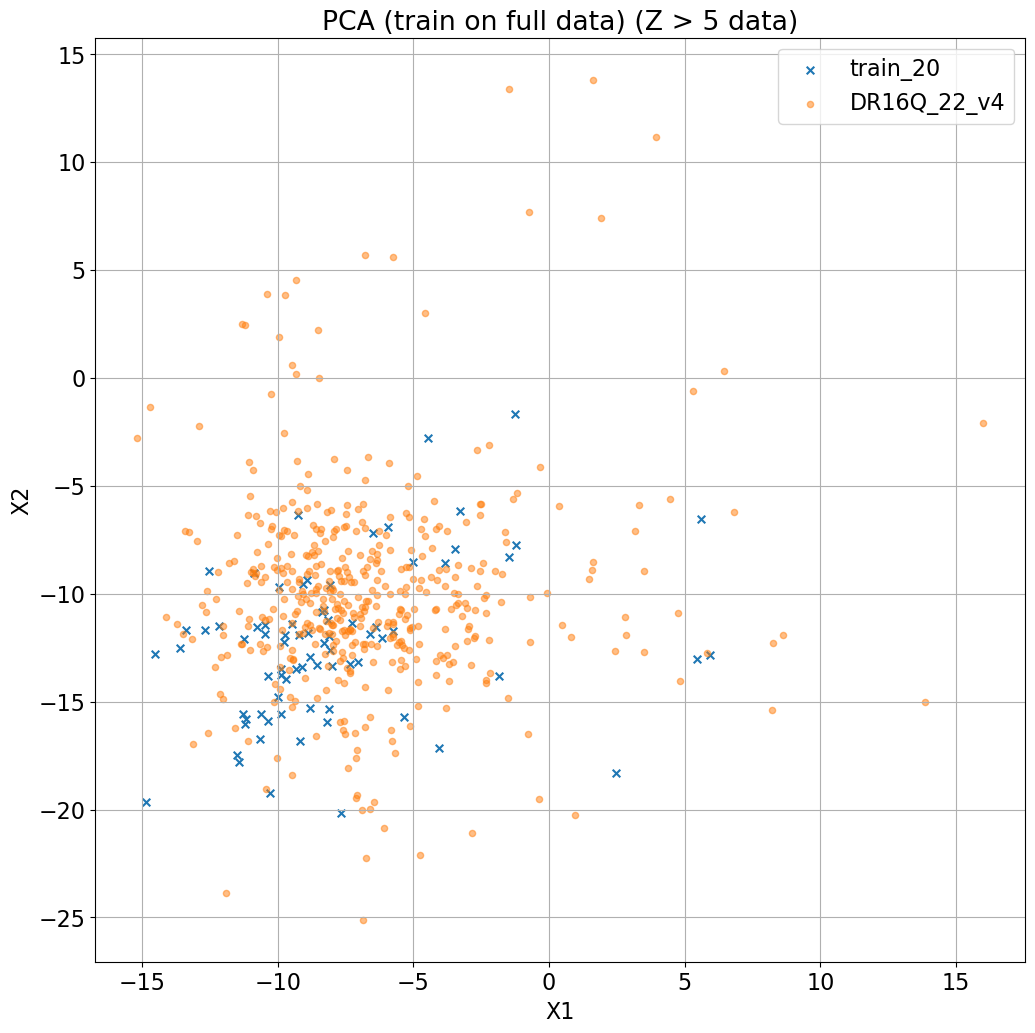

In [21]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.grid()

plt.scatter(
    pca_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'train_20')][:, 0],
    pca_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'train_20')][:, 1],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pca_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'DR16Q_22_v4')][:, 0],
    pca_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'DR16Q_22_v4')][:, 1],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('PCA (train on full data) (Z > 5 data)')
plt.xlabel('X1')
plt.ylabel('X2');

In [22]:
features_z5 = pred_data[pred_data['Z'] > 5].iloc[:, 6:72].values

In [23]:
pca_z5 = PCA(n_components=2).fit(features_z5)

In [24]:
pca_features_z5 = pca_z5.transform(features_z5)

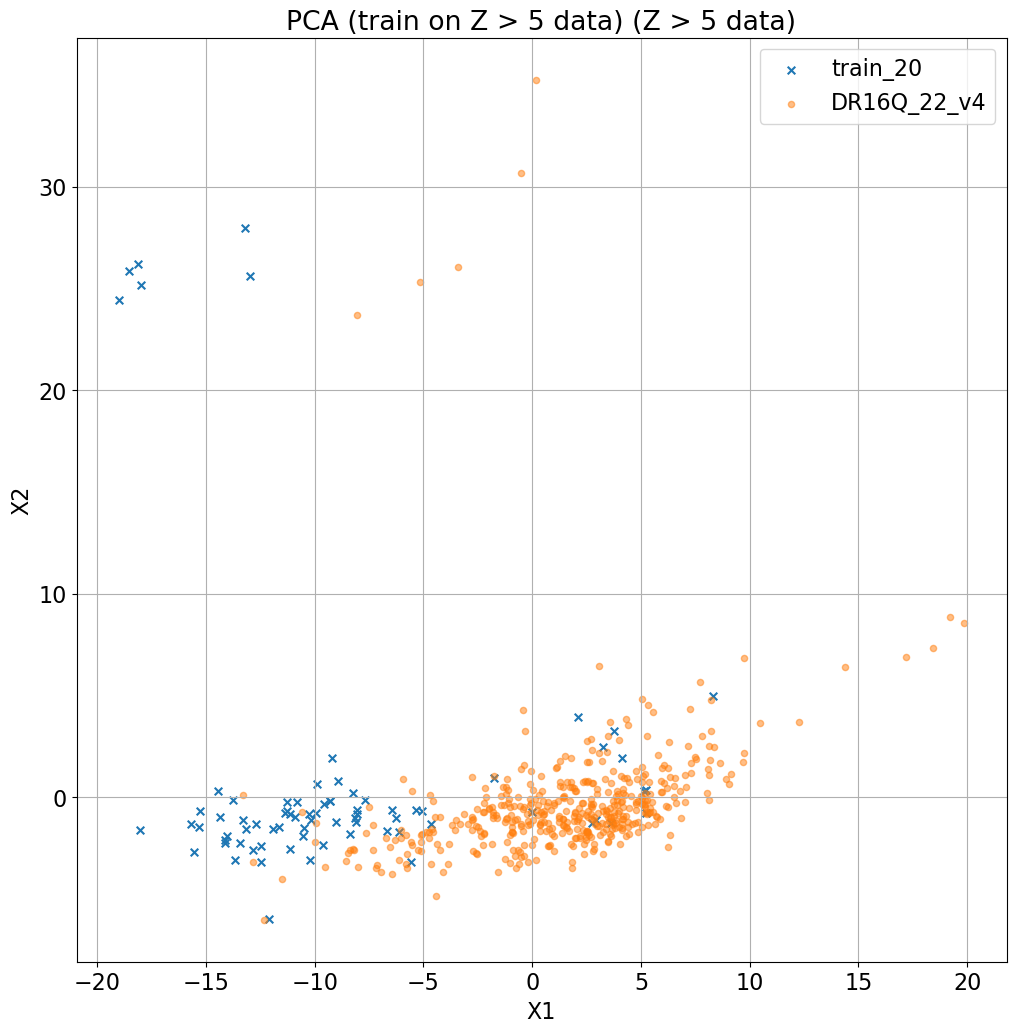

In [25]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.grid()

plt.scatter(
    pca_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'train_20'][:, 0],
    pca_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'train_20'][:, 1],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    pca_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'DR16Q_22_v4'][:, 0],
    pca_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'DR16Q_22_v4'][:, 1],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('PCA (train on Z > 5 data) (Z > 5 data)')
plt.xlabel('X1')
plt.ylabel('X2');

In [26]:
# tsne = TSNE(n_components=2, verbose=2).fit(features)

In [27]:
# tsne_features = tsne.transform(features)

In [28]:
# font = {'size': 16}
# plt.rc('font', **font)
# fig = plt.figure(figsize=(12, 12))
# plt.grid()

# plt.scatter(
#     tsne_features[pred_data['SOURCE'] == 'train_20'][:, 0],
#     tsne_features[pred_data['SOURCE'] == 'train_20'][:, 1],
#     s=30, marker='x', label='train_20', alpha=1.0
# )
# plt.scatter(
#     tsne_features[pred_data['SOURCE'] == 'DR16Q_22_v4'][:, 0],
#     tsne_features[pred_data['SOURCE'] == 'DR16Q_22_v4'][:, 1],
#     s=20, label='DR16Q_22_v4', alpha=0.5
# )
# plt.legend();

In [29]:
# font = {'size': 16}
# plt.rc('font', **font)
# fig = plt.figure(figsize=(12, 12))
# plt.grid()

# plt.scatter(
#     tsne_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'train_20')][:, 0],
#     tsne_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'train_20')][:, 1],
#     s=30, marker='x', label='train_20', alpha=1.0
# )
# plt.scatter(
#     tsne_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'DR16Q_22_v4')][:, 0],
#     tsne_features[(pred_data['Z'] > 5) & (pred_data['SOURCE'] == 'DR16Q_22_v4')][:, 1],
#     s=20, label='DR16Q_22_v4', alpha=0.5
# )
# plt.legend();

In [30]:
tsne_features_z5 = TSNE(n_components=2).fit_transform(features_z5)

/home/svasilyev/.conda/envs/svasilyev/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/svasilyev/.conda/envs/svasilyev/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


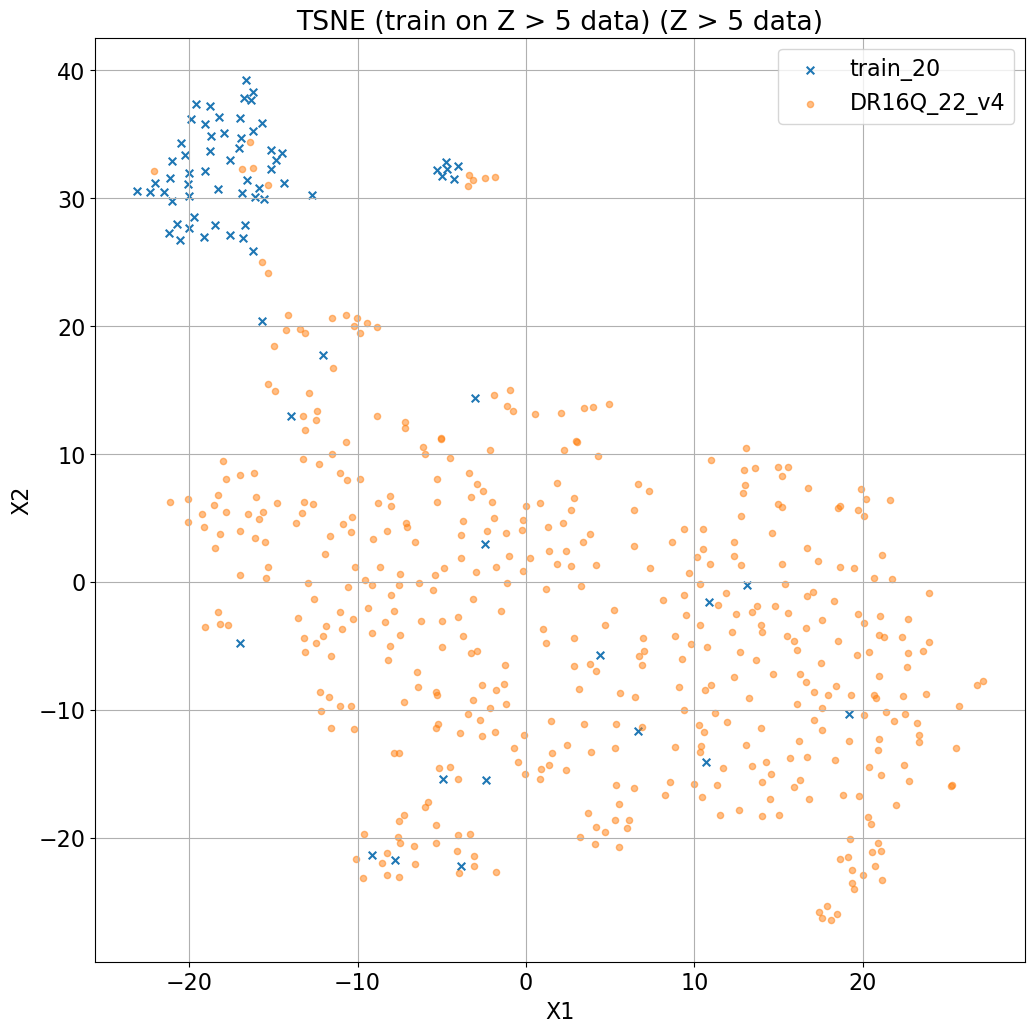

In [31]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 12))
plt.grid()

plt.scatter(
    tsne_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'train_20'][:, 0],
    tsne_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'train_20'][:, 1],
    s=30, marker='x', label='train_20', alpha=1.0
)
plt.scatter(
    tsne_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'DR16Q_22_v4'][:, 0],
    tsne_features_z5[pred_data[pred_data['Z'] > 5]['SOURCE'] == 'DR16Q_22_v4'][:, 1],
    s=20, label='DR16Q_22_v4', alpha=0.5
)
plt.legend()
plt.title('TSNE (train on Z > 5 data) (Z > 5 data)')
plt.xlabel('X1')
plt.ylabel('X2');